# 5.2 Continuous Distributions

Continuous distributions model phenomena that can take any value in an interval, like measurements of time, distance, or weight.

---

## 5.2.1 The Continuous Uniform Distribution

The simplest continuous distribution: **constant probability density** over an interval.

### Definition 5.7: Continuous Uniform Distribution

A random variable $X$ has a **continuous uniform distribution** on $[a, b]$ if its probability density function is:

$$p(x) = \begin{cases}
\frac{1}{b-a} & \text{if } a \leq x \leq b \\
0 & \text{otherwise}
\end{cases}$$

We write $X \sim \text{Uniform}[a, b]$.

### Useful Facts 5.5: Mean and Variance of Continuous Uniform

For $X \sim \text{Uniform}[a, b]$:
1. **Mean**: $\frac{a+b}{2}$ (the midpoint)
2. **Variance**: $\frac{(b-a)^2}{12}$

### Derivation

**Mean**:
$$E[X] = \int_a^b x \cdot \frac{1}{b-a} dx = \frac{1}{b-a} \cdot \frac{x^2}{2}\Big|_a^b = \frac{b^2-a^2}{2(b-a)} = \frac{a+b}{2}$$

**Variance**:
$$E[X^2] = \int_a^b x^2 \cdot \frac{1}{b-a} dx = \frac{1}{b-a} \cdot \frac{x^3}{3}\Big|_a^b = \frac{b^3-a^3}{3(b-a)} = \frac{a^2+ab+b^2}{3}$$

$$\text{Var}(X) = E[X^2] - (E[X])^2 = \frac{a^2+ab+b^2}{3} - \left(\frac{a+b}{2}\right)^2 = \frac{(b-a)^2}{12}$$

### Examples and Applications

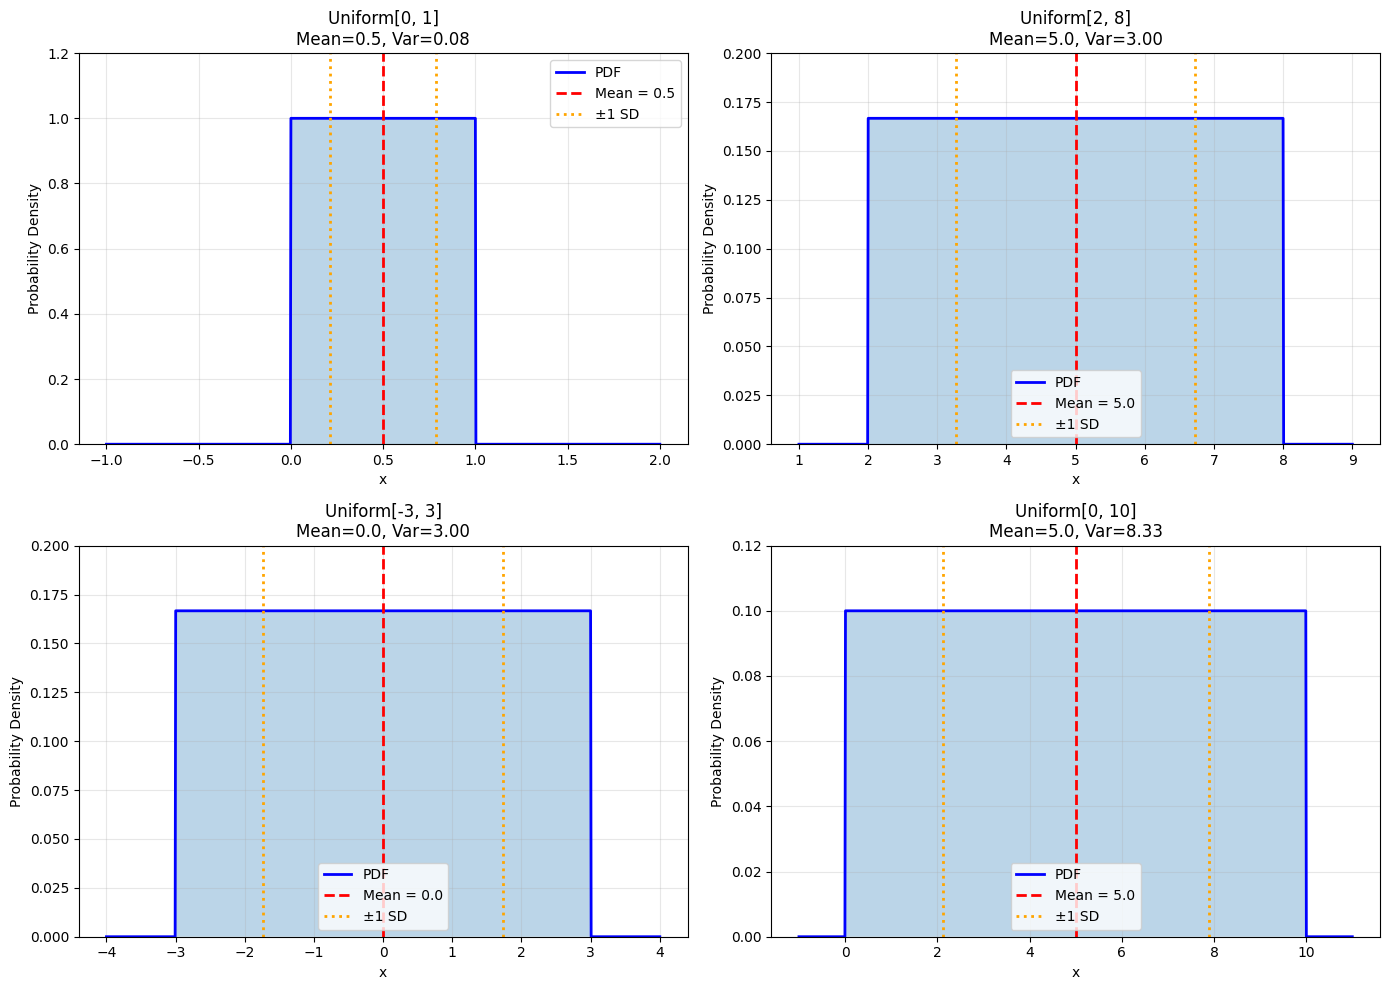

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Different uniform distributions
ranges = [(0, 1), (2, 8), (-3, 3), (0, 10)]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, (a, b) in enumerate(ranges):
    x = np.linspace(a - 1, b + 1, 1000)
    pdf = stats.uniform.pdf(x, loc=a, scale=b-a)
    
    mean = (a + b) / 2
    var = (b - a)**2 / 12
    
    axes[idx].plot(x, pdf, 'b-', linewidth=2, label='PDF')
    axes[idx].fill_between(x, 0, pdf, alpha=0.3)
    axes[idx].axvline(mean, color='r', linestyle='--', linewidth=2, 
                      label=f'Mean = {mean:.1f}')
    axes[idx].axvline(mean - np.sqrt(var), color='orange', linestyle=':', linewidth=2)
    axes[idx].axvline(mean + np.sqrt(var), color='orange', linestyle=':', linewidth=2,
                      label=f'±1 SD')
    
    axes[idx].set_xlabel('x')
    axes[idx].set_ylabel('Probability Density')
    axes[idx].set_title(f'Uniform[{a}, {b}]\nMean={mean:.1f}, Var={var:.2f}')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)
    axes[idx].set_ylim([0, max(pdf) * 1.2])

plt.tight_layout()
plt.show()

**Applications**:
- Random number generation (0 to 1)
- Rounding errors
- Arrival time within an hour (if no other information)
- Random positions in an interval

---

## 5.2.2 The Beta Distribution

The **Beta distribution** is extremely flexible and defined on $[0, 1]$, making it perfect for modeling **probabilities** and **proportions**.

### Definition 5.8: Beta Distribution

A random variable $X$ has a **Beta distribution** with parameters $\alpha > 0$ and $\beta > 0$ if:

$$p(x) = \begin{cases}
\frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha, \beta)} & \text{if } 0 \leq x \leq 1 \\
0 & \text{otherwise}
\end{cases}$$

where $B(\alpha, \beta) = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha+\beta)}$ is the **Beta function** (normalizing constant).

We write $X \sim \text{Beta}(\alpha, \beta)$.

### Useful Facts 5.6: Mean and Variance of Beta

For $X \sim \text{Beta}(\alpha, \beta)$:
1. **Mean**: $\frac{\alpha}{\alpha + \beta}$
2. **Variance**: $\frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)}$

### Understanding the Parameters

- **$\alpha$**: Think of this as "number of successes + 1"
- **$\beta$**: Think of this as "number of failures + 1"
- **Shape**: Controlled by $\alpha$ and $\beta$

### Special Cases

- $\text{Beta}(1, 1) = \text{Uniform}[0, 1]$
- $\alpha = \beta$: Symmetric around 0.5
- $\alpha > \beta$: Skewed toward 1
- $\alpha < \beta$: Skewed toward 0
- Large $\alpha, \beta$: More concentrated

### Visualization

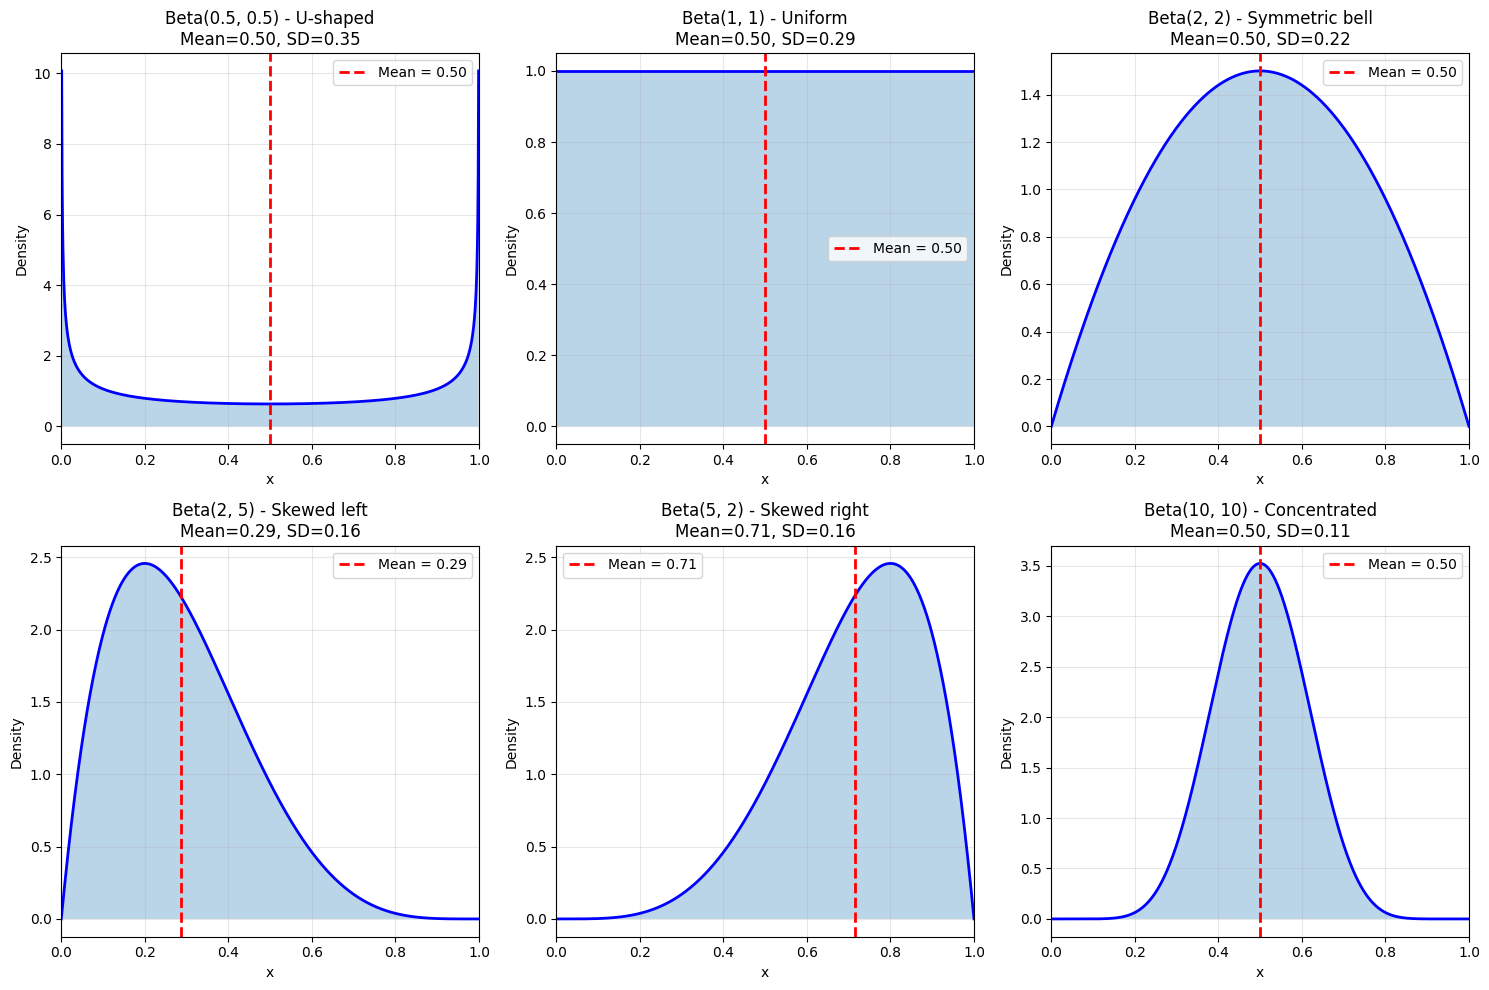

In [2]:
# Beta distributions with different parameters
from scipy.stats import beta as beta_dist

params = [
    (0.5, 0.5, 'U-shaped'),
    (1, 1, 'Uniform'),
    (2, 2, 'Symmetric bell'),
    (2, 5, 'Skewed left'),
    (5, 2, 'Skewed right'),
    (10, 10, 'Concentrated')
]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

x = np.linspace(0, 1, 1000)

for idx, (a, b, desc) in enumerate(params):
    pdf = beta_dist.pdf(x, a, b)
    mean = a / (a + b)
    var = (a * b) / ((a + b)**2 * (a + b + 1))
    
    axes[idx].plot(x, pdf, 'b-', linewidth=2)
    axes[idx].fill_between(x, 0, pdf, alpha=0.3)
    axes[idx].axvline(mean, color='r', linestyle='--', linewidth=2, 
                      label=f'Mean = {mean:.2f}')
    
    axes[idx].set_xlabel('x')
    axes[idx].set_ylabel('Density')
    axes[idx].set_title(f'Beta({a}, {b}) - {desc}\nMean={mean:.2f}, SD={np.sqrt(var):.2f}')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)
    axes[idx].set_xlim([0, 1])

plt.tight_layout()
plt.show()

**Applications**:
- **Bayesian statistics**: Prior and posterior for probabilities
- **Project management**: Task completion proportions
- **Quality control**: Defect rates
- **Sports**: Win probabilities
- **Biology**: Allele frequencies

### Example: Bayesian Update

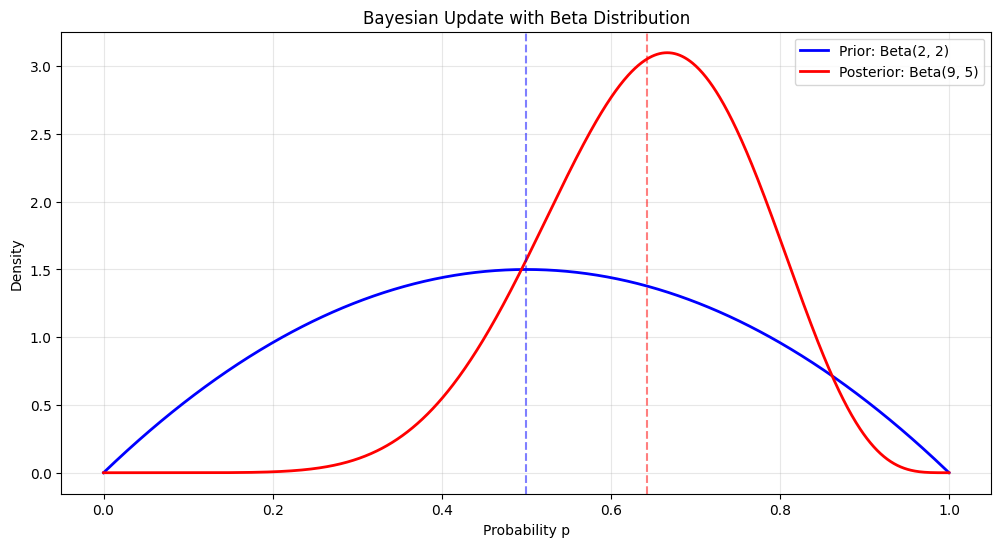

Prior mean: 0.500
Posterior mean: 0.643


In [3]:
# Beta distribution as Bayesian prior/posterior
# Prior: Beta(2, 2) (weak belief that p ≈ 0.5)
# Observe 7 successes, 3 failures
# Posterior: Beta(2+7, 2+3) = Beta(9, 5)

alpha_prior, beta_prior = 2, 2
successes, failures = 7, 3
alpha_post, beta_post = alpha_prior + successes, beta_prior + failures

x = np.linspace(0, 1, 1000)
prior = beta_dist.pdf(x, alpha_prior, beta_prior)
posterior = beta_dist.pdf(x, alpha_post, beta_post)

plt.figure(figsize=(12, 6))
plt.plot(x, prior, 'b-', linewidth=2, label=f'Prior: Beta({alpha_prior}, {beta_prior})')
plt.plot(x, posterior, 'r-', linewidth=2, 
         label=f'Posterior: Beta({alpha_post}, {beta_post})')
plt.axvline(alpha_prior/(alpha_prior+beta_prior), color='b', linestyle='--', alpha=0.5)
plt.axvline(alpha_post/(alpha_post+beta_post), color='r', linestyle='--', alpha=0.5)
plt.xlabel('Probability p')
plt.ylabel('Density')
plt.title('Bayesian Update with Beta Distribution')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Prior mean: {alpha_prior/(alpha_prior+beta_prior):.3f}")
print(f"Posterior mean: {alpha_post/(alpha_post+beta_post):.3f}")

---

## 5.2.3 The Gamma Distribution

The **Gamma distribution** is a flexible family for modeling **positive-valued** quantities, especially waiting times.

### Definition 5.9: Gamma Distribution

A random variable $X$ has a **Gamma distribution** with shape $\alpha > 0$ and rate $\beta > 0$ if:

$$p(x) = \begin{cases}
\frac{\beta^\alpha x^{\alpha-1} e^{-\beta x}}{\Gamma(\alpha)} & \text{if } x > 0 \\
0 & \text{otherwise}
\end{cases}$$

where $\Gamma(\alpha) = \int_0^\infty t^{\alpha-1}e^{-t}dt$ is the **Gamma function**.

We write $X \sim \text{Gamma}(\alpha, \beta)$.

**Note**: Some sources use **scale** $\theta = 1/\beta$ instead of rate.

### Useful Facts 5.7: Mean and Variance of Gamma

For $X \sim \text{Gamma}(\alpha, \beta)$ (using **rate** parameterization):
1. **Mean**: $\frac{\alpha}{\beta}$
2. **Variance**: $\frac{\alpha}{\beta^2}$

### Important Property: Sum of Exponentials

If $X_1, \ldots, X_n$ are independent $\text{Exponential}(\lambda)$ random variables, then:
$$X_1 + X_2 + \cdots + X_n \sim \text{Gamma}(n, \lambda)$$

**Interpretation**: Time until $n$-th event in a Poisson process.

### Visualization

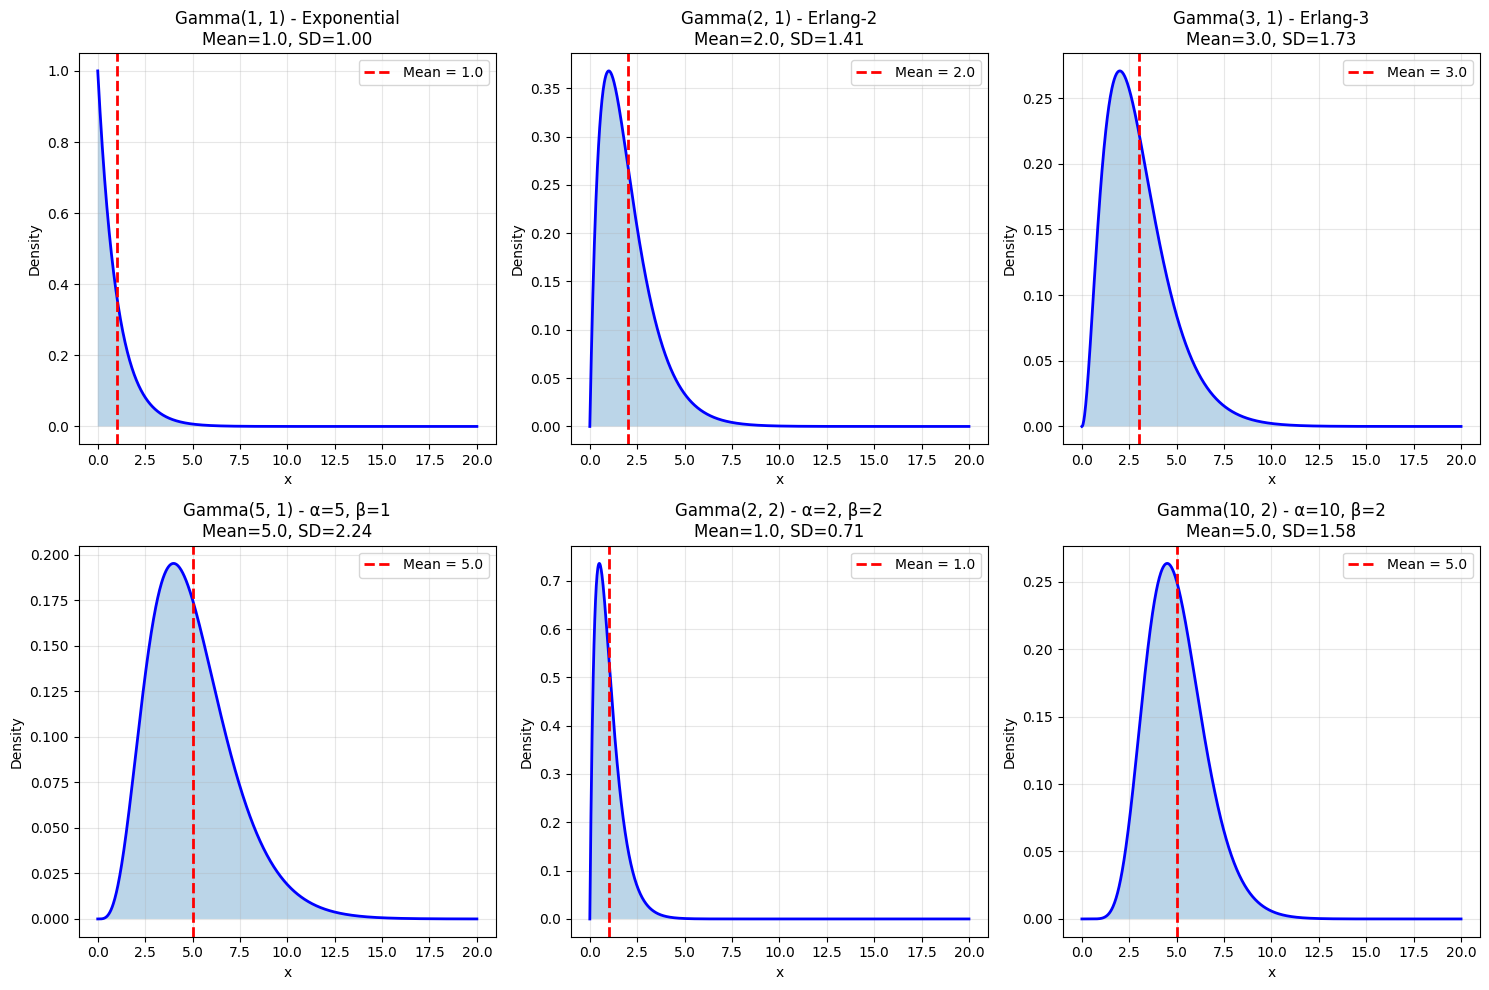

In [4]:
from scipy.stats import gamma

# Different Gamma distributions
params = [
    (1, 1, 'Exponential'),
    (2, 1, 'Erlang-2'),
    (3, 1, 'Erlang-3'),
    (5, 1, 'α=5, β=1'),
    (2, 2, 'α=2, β=2'),
    (10, 2, 'α=10, β=2')
]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, (a, b, desc) in enumerate(params):
    x = np.linspace(0, max(20, a/b * 4), 1000)
    pdf = gamma.pdf(x, a, scale=1/b)
    
    mean = a / b
    var = a / b**2
    
    axes[idx].plot(x, pdf, 'b-', linewidth=2)
    axes[idx].fill_between(x, 0, pdf, alpha=0.3)
    axes[idx].axvline(mean, color='r', linestyle='--', linewidth=2, 
                      label=f'Mean = {mean:.1f}')
    
    axes[idx].set_xlabel('x')
    axes[idx].set_ylabel('Density')
    axes[idx].set_title(f'Gamma({a}, {b}) - {desc}\nMean={mean:.1f}, SD={np.sqrt(var):.2f}')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Applications**:
- **Waiting times**: Time until $k$-th event
- **Insurance**: Claim sizes
- **Reliability**: Component lifetimes
- **Hydrology**: Rainfall amounts
- **Finance**: Risk modeling

---

## 5.2.4 The Exponential Distribution

The **Exponential distribution** models **time between events** in a Poisson process.

### Definition 5.10: Exponential Distribution

A random variable $X$ has an **Exponential distribution** with rate $\lambda > 0$ if:

$$p(x) = \begin{cases}
\lambda e^{-\lambda x} & \text{if } x \geq 0 \\
0 & \text{otherwise}
\end{cases}$$

We write $X \sim \text{Exponential}(\lambda)$ or $X \sim \text{Exp}(\lambda)$.

**Note**: $\text{Exponential}(\lambda) = \text{Gamma}(1, \lambda)$

### Useful Facts 5.8: Mean and Variance of Exponential

For $X \sim \text{Exponential}(\lambda)$:
1. **Mean**: $\frac{1}{\lambda}$
2. **Variance**: $\frac{1}{\lambda^2}$

### The Memoryless Property

**Most Important Property**: The exponential distribution is **memoryless**:

$$P(X > s + t \mid X > s) = P(X > t)$$

**Interpretation**: If you've already waited time $s$, the probability of waiting an additional $t$ is the same as if you just started!

**Proof**:
$$P(X > s + t \mid X > s) = \frac{P(X > s + t)}{P(X > s)} = \frac{e^{-\lambda(s+t)}}{e^{-\lambda s}} = e^{-\lambda t} = P(X > t)$$

### Visualization

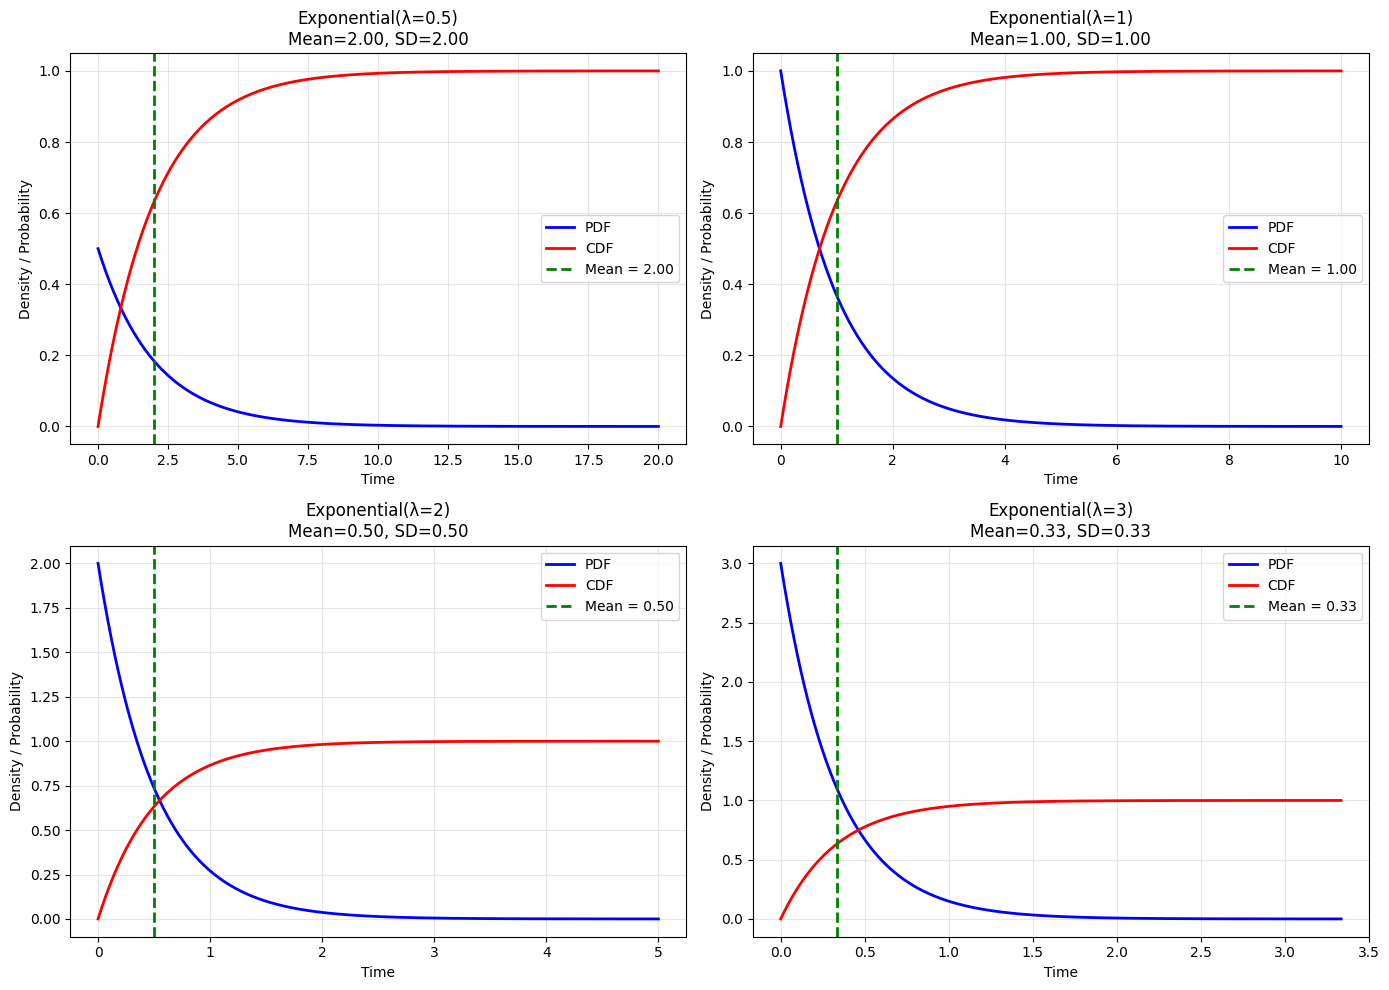

In [5]:
from scipy.stats import expon

# Different exponential distributions
lambdas = [0.5, 1, 2, 3]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, lam in enumerate(lambdas):
    x = np.linspace(0, 10/lam, 1000)
    pdf = expon.pdf(x, scale=1/lam)
    cdf = expon.cdf(x, scale=1/lam)
    
    mean = 1/lam
    
    ax = axes[idx]
    ax.plot(x, pdf, 'b-', linewidth=2, label='PDF')
    ax.plot(x, cdf, 'r-', linewidth=2, label='CDF')
    ax.axvline(mean, color='g', linestyle='--', linewidth=2, 
               label=f'Mean = {mean:.2f}')
    
    ax.set_xlabel('Time')
    ax.set_ylabel('Density / Probability')
    ax.set_title(f'Exponential(λ={lam})\nMean={mean:.2f}, SD={mean:.2f}')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Connection to Poisson Process

If events occur according to a **Poisson process** with rate $\lambda$:
- **Number** of events in time $t$: $\text{Poisson}(\lambda t)$
- **Time** until next event: $\text{Exponential}(\lambda)$
- **Time** until $n$-th event: $\text{Gamma}(n, \lambda)$

### Demonstration of Memoryless Property

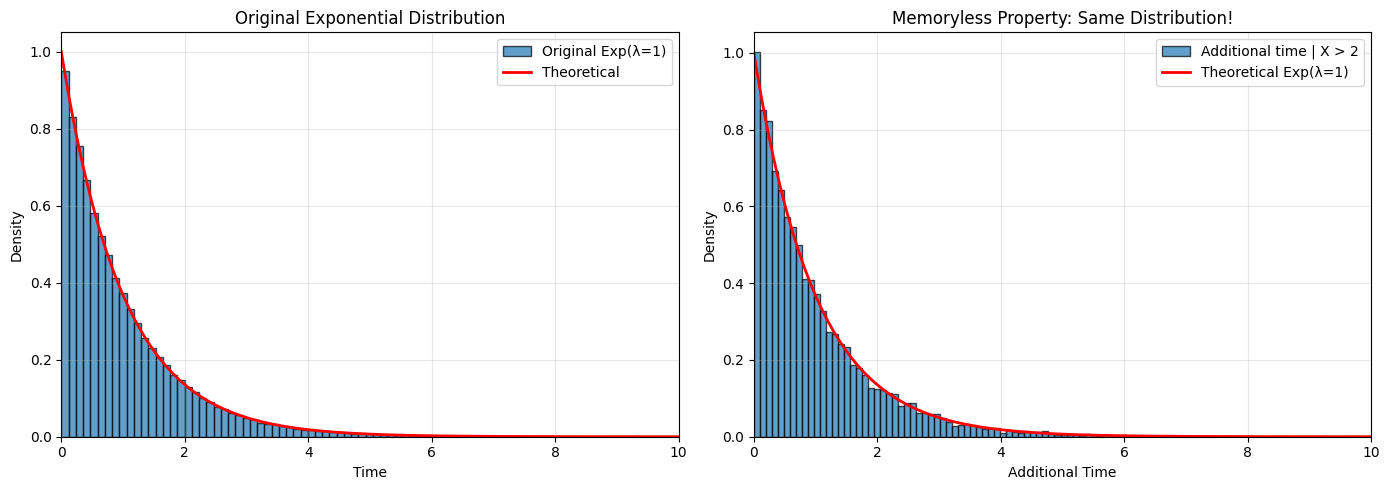

Original mean: 0.996
Additional time mean (after waiting 2): 0.988
Theoretical mean: 1.000

→ They're the same! This is the memoryless property.


In [6]:
# Demonstrate memoryless property
np.random.seed(42)
lam = 1.0

# Simulate many exponential waiting times
n_sims = 100000
waiting_times = np.random.exponential(1/lam, n_sims)

# Condition: X > 2
conditioned_times = waiting_times[waiting_times > 2]
# Look at additional waiting time beyond 2
additional_times = conditioned_times - 2

# Compare distributions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Original distribution
ax1.hist(waiting_times, bins=100, density=True, alpha=0.7, 
         label='Original Exp(λ=1)', edgecolor='black')
x = np.linspace(0, 10, 1000)
ax1.plot(x, expon.pdf(x, scale=1/lam), 'r-', linewidth=2, label='Theoretical')
ax1.set_xlabel('Time')
ax1.set_ylabel('Density')
ax1.set_title('Original Exponential Distribution')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_xlim([0, 10])

# Additional time after conditioning
ax2.hist(additional_times, bins=100, density=True, alpha=0.7, 
         label='Additional time | X > 2', edgecolor='black')
ax2.plot(x, expon.pdf(x, scale=1/lam), 'r-', linewidth=2, 
         label='Theoretical Exp(λ=1)')
ax2.set_xlabel('Additional Time')
ax2.set_ylabel('Density')
ax2.set_title('Memoryless Property: Same Distribution!')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_xlim([0, 10])

plt.tight_layout()
plt.show()

print(f"Original mean: {np.mean(waiting_times):.3f}")
print(f"Additional time mean (after waiting 2): {np.mean(additional_times):.3f}")
print(f"Theoretical mean: {1/lam:.3f}")
print("\n→ They're the same! This is the memoryless property.")

**Applications**:
- **Reliability**: Time until component failure
- **Queueing**: Service times, inter-arrival times
- **Radioactive decay**: Time until next decay
- **Call centers**: Time between calls
- **Earthquakes**: Time until next event

---

## Summary Table

| Distribution | PDF | Support | Mean | Variance | Key Property |
|--------------|-----|---------|------|----------|-------------|
| **Uniform** | $\frac{1}{b-a}$ | $[a, b]$ | $\frac{a+b}{2}$ | $\frac{(b-a)^2}{12}$ | All values equally likely |
| **Beta** | $\frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha,\beta)}$ | $[0, 1]$ | $\frac{\alpha}{\alpha+\beta}$ | $\frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)}$ | Models probabilities |
| **Gamma** | $\frac{\beta^\alpha x^{\alpha-1} e^{-\beta x}}{\Gamma(\alpha)}$ | $(0, \infty)$ | $\frac{\alpha}{\beta}$ | $\frac{\alpha}{\beta^2}$ | Sum of exponentials |
| **Exponential** | $\lambda e^{-\lambda x}$ | $[0, \infty)$ | $\frac{1}{\lambda}$ | $\frac{1}{\lambda^2}$ | Memoryless |

---

## Practice Problems

1. A random number generator produces values uniformly in $[0, 10]$. What's the probability it generates a value between 3 and 7?

2. For $X \sim \text{Beta}(3, 2)$, compute $E[X]$ and the mode (most likely value).

3. Customers arrive at a store according to a Poisson process with rate 10 per hour. What's the probability the next customer arrives:
   - Within 6 minutes?
   - After 12 minutes?

4. Prove the memoryless property of the exponential distribution.

5. If $X \sim \text{Gamma}(5, 2)$, what is $P(X > 3)$?

---

## Next Section

Now we'll study the most important distribution in all of statistics: the **Normal distribution**!

→ Continue to [5.3 The Normal Distribution](ch05_normal.md)

→ Return to [Chapter 5 Overview](chapter05.md)